$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
\def\Z{\mathbb{Z}}
\def\R{\mathbb{R}}
\def\T{\mathbb{T}}
\def\bx{\boldsymbol{x}}
\def\bn{\boldsymbol{n}}
\def\bk{\boldsymbol{k}}
\def\A{\mathcal{A}}
\def\Lcal{\mathcal{L}}
\def\Ucal{\mathcal{U}}
\def\Vcal{\mathcal{V}}
\def\Wcal{\mathcal{W}}
\def\Pcal{\mathcal{P}}
\def\Xcal{\mathcal{X}}
\def\be{\mathbf{e}}
$$
# Rauzy induction of polygon partitions and toral $\Z^2$-rotations

Sébastien Labbé, CNRS, LaBRI, Université de Bordeaux

Conference [Algebraic and Combinatorial Invariants of Subshifts and Tilings](https://conferences.cirm-math.fr/2313.html), CIRM, Marseille, January 13, 2021

These slides are available in 3 formats:
 - html: http://www.slabbe.org/Communications/2021-01-cirm.slides.html
 - pdf: http://www.slabbe.org/Communications/2021-01-cirm.pdf
 - the source (SageMath Jupyter notebook): http://www.slabbe.org/Communications/2021-01-cirm.ipynb

*HELP for navigating in the HTML slides:*

- SPACE BAR = next slide,
- SHIFT + SPACE = previous slide, 
- ESC = overview

Outline as 5 sections (disposed as columns of slides if viewed in html format):

 - 1 - Polyhedrons, Polyhedron partitions and PETs
 - 2 - Rauzy induction of PETs and of toral partitions
 - 3 - A particular partition $\Pcal_\Ucal$ of $\T^2$
 - 4 - Inducing the partition $\Pcal_\Ucal$ with respect to a toral $\Z^2$-rotation
 - 5 - Results


## 1 - Polyhedrons, Polyhedron partitions, PETs, symbolic representation

Computations (arithmetic, comparisons, etc.) are more efficient when performed in a number field like $\mathbb{Q}(\varphi)$ with $\varphi=(1+\sqrt{5})/2$.

In [1]:
z = polygen(QQ, 'z')
K.<phi> = NumberField(z**2-z-1, 'phi', embedding=RR(1.6)); K

Number Field in phi with defining polynomial z^2 - z - 1 with phi = 1.618033988749895?

In [2]:
phi.n(digits=500)

1.6180339887498948482045868343656381177203091798057628621354486227052604628189024497072072041893911374847540880753868917521266338622235369317931800607667263544333890865959395829056383226613199282902678806752087668925017116962070322210432162695486262963136144381497587012203408058879544547492461856953648644492410443207713449470495658467885098743394422125448770664780915884607499887124007652170575179788341662562494075890697040002812104276217711177780531531714101170466659914669798731761356006708748071

In [3]:
phi^2 + phi^-10

-54*phi + 90

### Polyhedron in SageMath: from vertices

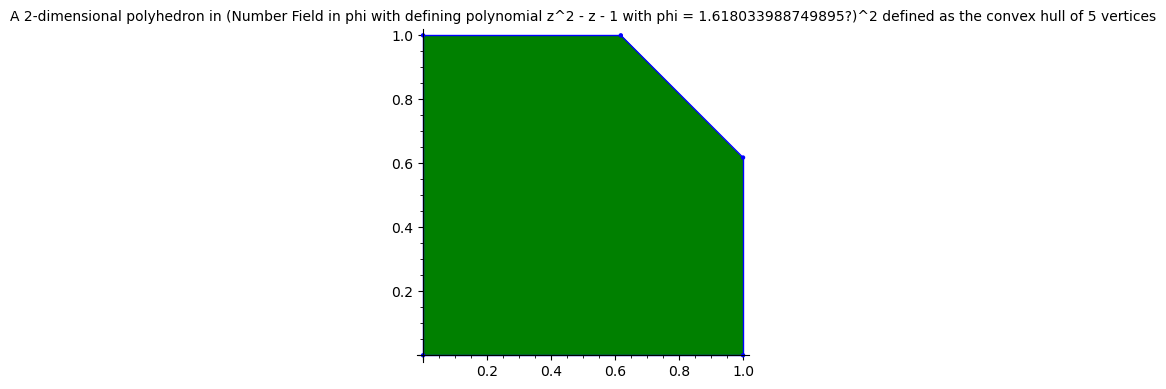

In [4]:
vertices = [(0,0), (1,0), (0,1), (1,1/phi), (1/phi,1)]
bottom = Polyhedron(vertices)
bottom

### Polyhedron in SageMath: from inequalities

Convention for inequalities: $7+2x_1-3x_2\geq 0$ is incoded as ``(7, 2, -3)``.

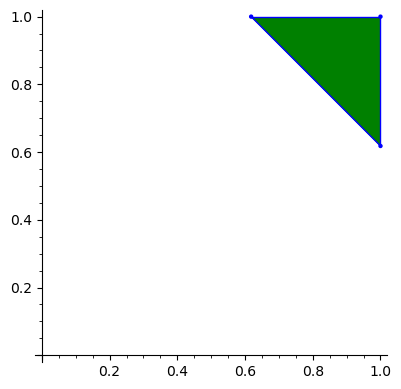

In [5]:
top = Polyhedron(ieqs=[(-1/phi-1,1,1), (1,-1,0), (1,0,-1)])
top.plot(xmin=0, ymin=0)

### Polyhedron partition

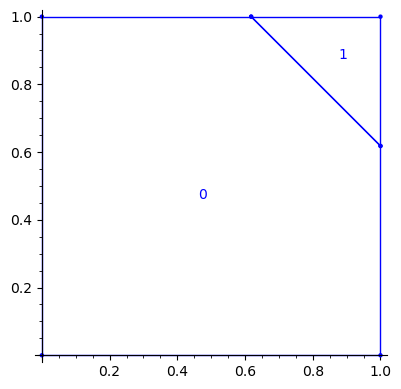

In [6]:
from slabbe import PolyhedronPartition
P = PolyhedronPartition([bottom, top])
P.plot()

### Shortcut: refine a partition by a hyperplane

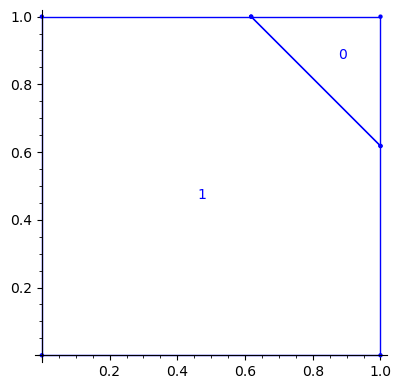

In [7]:
square = Polyhedron([(0,0), (1,0), (0,1), (1,1)])
P = PolyhedronPartition([square])
P = P.refine_by_hyperplane([-1/phi-1,1,1])
P.plot()

### Polyhedron Exchange Transformation on $[0,1)^2\simeq\T^2$

In [8]:
from slabbe import PolyhedronExchangeTransformation as PET
lattice_base = matrix.column([(1,0), (0,1)])
T = PET.toral_translation(lattice_base, vector((phi^-2,0)))

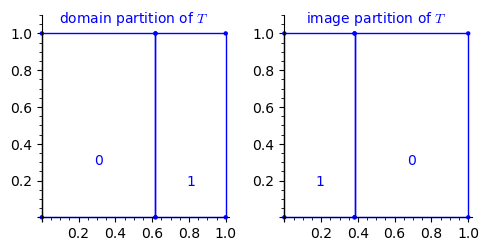

In [9]:
def title(content, height=1.08, fontsize=10):
    return text(content, (.5, height), fontsize=fontsize)
t1 = title(r"domain partition of $T$", fontsize=10)
t2 = title(r"image partition of $T$", fontsize=10)
graphics_array([T.partition().plot()+t1, T.image_partition().plot()+t2]).show(figsize=5)

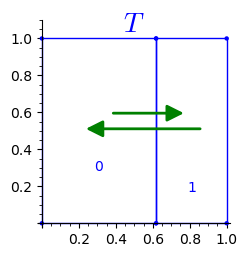

In [10]:
t = title(r"$T$", fontsize=20)
(T.plot()+t).show(figsize=4)

## A toral $\Z^2$-rotation

A continuous $\Z^2$-action
$\begin{array}{lcll}
    R_0:&\Z^2\times\T^2&\to&\T^2\\
    & (\bn,\bx)&\mapsto&\bx+\varphi^{-2}\bn \bmod\Z^2
\end{array}$ can be written as a pair of commuting PETs.


In [11]:
R0e1 = PET.toral_translation(lattice_base, vector((phi^-2,0)))
R0e2 = PET.toral_translation(lattice_base, vector((0,phi^-2)))

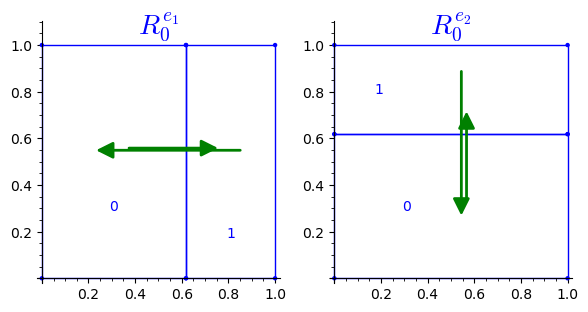

In [12]:
t1 = title(r"$R_0^{e_1}$", fontsize=20)
t2 = title(r"$R_0^{e_2}$", fontsize=20)
graphics_array([R0e1.plot()+t1, R0e2.plot()+t2])

### Symbolic dynamical system

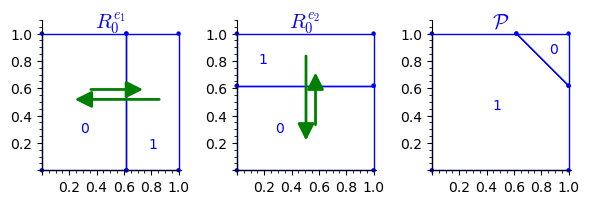

In [13]:
t1 = title(r"$R_0^{e_1}$", fontsize=15); t2 = title(r"$R_0^{e_2}$", fontsize=15); t3 = title(r"$\mathcal{P}$", fontsize=15)
graphics_array([R0e1.plot()+t1, R0e2.plot()+t2, P.plot()+t3])

- Let $(\T,\Z^2,R)$ be the dynamical system  given by a $\Z^2$-rotation $R$ on $\T$.
- For some finite set $\A$, a **topological partition** of $\T$ is a finite collection $\{P_a\}_{a\in\A}$ of disjoint open sets $P_a\subset\T$ such that $\T = \bigcup_{a\in\A} \overline{P_a}$.
- If $S\subset\Z^2$ is a finite set, we say that a pattern $w\in\A^S$ of support $S$ is **allowed** for $\Pcal,R$ if
$$
    \bigcap_{\bk\in S} R^{-\bk}(P_{w_\bk}) \neq \varnothing.
$$
- Let $\Lcal_{\Pcal,R}$ be the collection of all allowed patterns for $\Pcal,R$.
The set $\Lcal_{\Pcal,R}$ is the language of the **symbolic dynamical
system** corresponding to $\Pcal,R$, i.e., the subshift 
$\Xcal_{\Pcal,R}\subseteq\A^{\Z^2}$ defined as
$$
    \Xcal_{\Pcal,R} = 
    \{x\in\A^{\Z^2} \mid \pi_S\circ\sigma^\bn(x)\in\Lcal_{\Pcal,R}
    \text{ for every } \bn\in\Z^2 \text{ and finite subset } S\subset\Z^2\},
$$
see Prop. 9.2.4 in the chapter [Hochman 2016](https://doi.org/10.1017/CBO9781139924733.010).

## 2 - Rauzy induction of a PET and of a partition

Recall that the **first return map**
$\widehat{T}|_W$ of a dynamical system $(X,T)$ maps a point $\bx\in W\subset X$ 
to the first point in the forward orbit of
$T$ lying in $W$, i.e.
$$
    \widehat{T}|_W(\bx) = T^{r(\bx)}(\bx) \quad\text{ where }
    r(\bx) = \min\{k\in\Z_{>0} : T^k(\bx)\in W\}.
$$

Facts:

- From Poincaré's recurrence theorem, if $\mu$ is a finite $T$-invariant measure on $X$, then the first return map $\widehat{T}|_W$ is well defined for $\mu$-almost all $\bx\in W$. 
- Moreover if $T$ is a PET and $W$ is a polyhedron, then the first return map $\widehat{T}|_W$ is a PET.
- If $\Pcal$ is a partition of $X$, then there exists a substitution $\beta$ and an induced partition $\widehat{\Pcal}|_W$ such that $\Xcal_{\Pcal,T}=\overline{\beta\left(\Xcal_{\widehat{\Pcal}|_W,\widehat{T}|_W}\right)}^\sigma$.
- If $W$ is the intersection of the domain with a half-space, then there is a nice algorithm to compute
$\widehat{\Pcal}|_W$, $\widehat{T}|_W$ and $\beta$, see [arXiv:1906.01104](https://arxiv.org/abs/1906.01104).

#### Helper function ``please_draw_Rauzy_induction``

This is some code to draw induced transformation on the next slide (you may safely ignore what is below).

In [14]:
bb = point([(0,0), (1,1)], color='white') ### hack to make all plots to have the same bounding box
def please_draw_Rauzy_induction(T, P, inducedT, inducedP, beta, figsize=9):
    t1 = title(r'transformation $T$', fontsize=15)
    t2 = title(r'partition $\mathcal{P}$', fontsize=15)
    t3 = title(r'induced transformation $\widehat{T}|_W$', fontsize=15)
    t4 = title(r'induced partition $\widehat{\mathcal{P}}|_W$', fontsize=15)
    graphics_array([T.plot()+bb+t1, P.plot()+bb+t2,
                    inducedT.plot()+bb+t3, 
                    inducedP.plot()+bb+t4], ncols=2).show(figsize=figsize)
    show(LatexExpr(r"\text{The induced substitution is }"+
                   r"\beta:{}".format(latex(beta))))

### Rauzy induction on subdomain $W$: $\Xcal_{\Pcal,T}=\overline{\beta\left(\Xcal_{\widehat{\Pcal}|_W,\widehat{T}|_W}\right)}^\sigma$

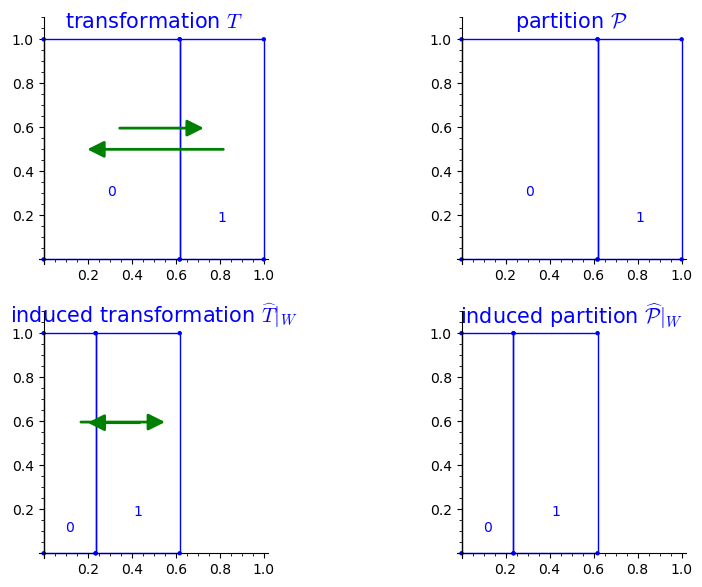

\text{The induced substitution is }\beta:\begin{array}{l}
0 \mapsto 0\\
1 \mapsto 01
\end{array}

In [15]:
x_ineq = [phi^-1, -1, 0] ### x <= phi^-1
inducedT,beta = T.induced_transformation(x_ineq)
please_draw_Rauzy_induction(T, T.partition(), inducedT,  inducedT.partition(), WordMorphism(beta))

### Rauzy induction on subdomain $W$: $\Xcal_{\Pcal,T}=\overline{\beta\left(\Xcal_{\widehat{\Pcal}|_W,\widehat{T}|_W}\right)}^\sigma$ for any partition $\Pcal$

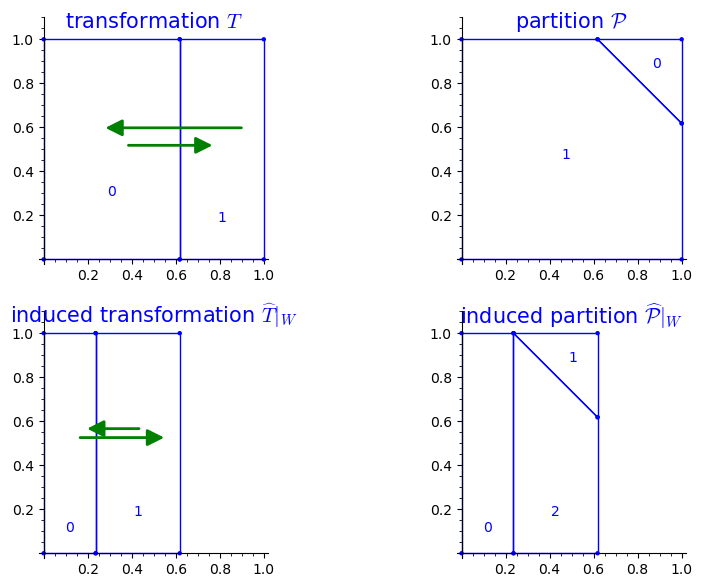

\text{The induced substitution is }\beta:\begin{array}{llllllll}
0\mapsto \left(1\right)
,&
1\mapsto \left(1,\,0\right)
,&
2\mapsto \left(1,\,1\right)
.
\end{array}

In [16]:
x_ineq = [phi^-1, -1, 0] ### x <= phi^-1
inducedT,_ = T.induced_transformation(x_ineq)
inducedP,beta = T.induced_partition(x_ineq, P, substitution_type='row')
please_draw_Rauzy_induction(T, P, inducedT, inducedP, beta)

### Rauzy induction on general subdomain $W$: $\Xcal_{\Pcal,T}=\overline{\beta\left(\Xcal_{\widehat{\Pcal}|_W,\widehat{T}|_W}\right)}^\sigma$ for any partition $\Pcal$

Of course, for general subdomain $W$, the induced transformation $\widehat{T}|_W$ of a toral rotation $T$ is not a toral rotation. Today, the induced transformations are toral rotations, so they commute between themselves.

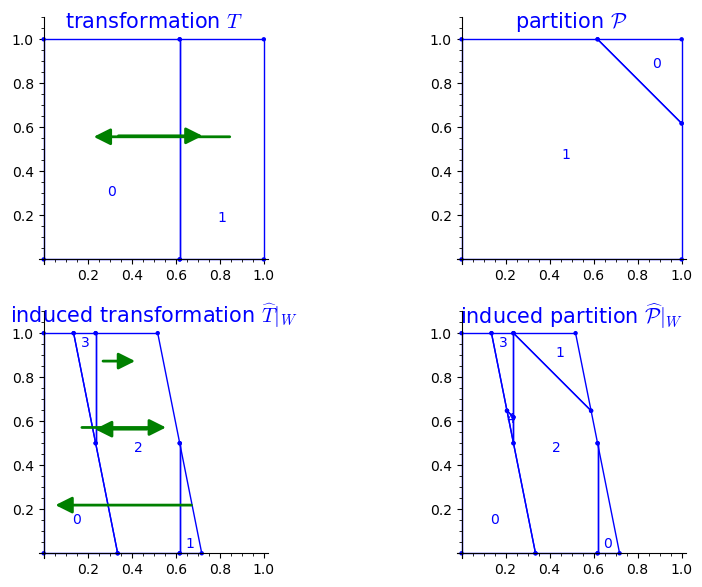

\text{The induced substitution is }\beta:\begin{array}{llllllll}
0\mapsto \left(1\right)
,&
1\mapsto \left(1,\,0\right)
,&
2\mapsto \left(1,\,1\right)
,&
3\mapsto \left(1,\,1,\,0\right)
,&
4\mapsto \left(1,\,1,\,1\right)
.
\end{array}

In [17]:
x_ineq = [phi^-1+1/10, -1, 0-1/5]
inducedT,_ = T.induced_transformation(x_ineq)
inducedP,beta = T.induced_partition(x_ineq, P, substitution_type='row')
please_draw_Rauzy_induction(T, P, inducedT, inducedP, beta)

## 3 -  A particular partition $\Pcal_\Ucal$ of $\T^2$

The polygon partition $P_a$:

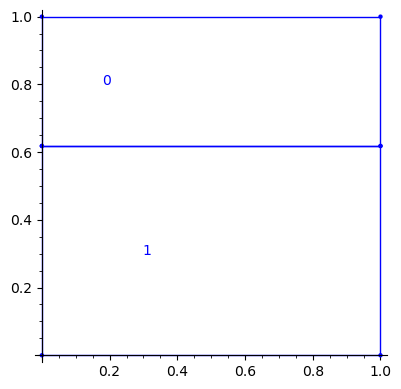

In [18]:
square = Polyhedron([(0,0), (1,0), (0,1), (1,1)])
Pa = PolyhedronPartition([square])
Pa = Pa.refine_by_hyperplane([-1/phi, 0, 1])
Pa.plot()

The polygon partition $P_b$:

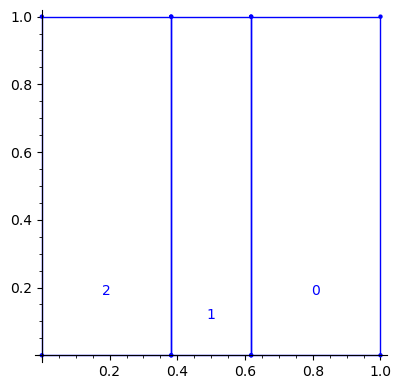

In [19]:
Pb = PolyhedronPartition([square])
Pb = Pb.refine_by_hyperplane([-1/phi, 1, 0])
Pb = Pb.refine_by_hyperplane([-1/phi^2, 1, 0])
Pb.plot()

The polygon partition $P_c$:

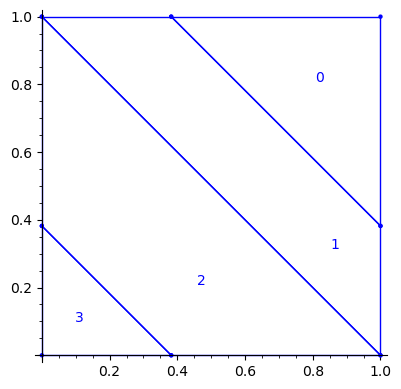

In [20]:
Pc = PolyhedronPartition([square])
Pc = Pc.refine_by_hyperplane([-1,1,1])
Pc = Pc.refine_by_hyperplane([-1/phi^2,1,1])
Pc = Pc.refine_by_hyperplane([-1/phi^2-1,1,1])
Pc.plot()

The polygon partition $P_d$:

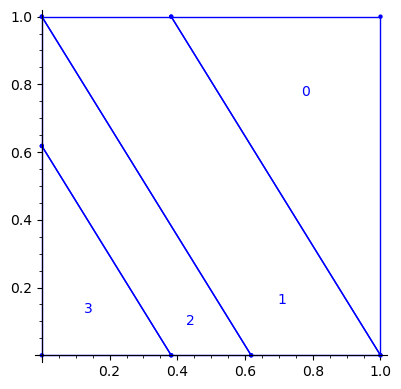

In [21]:
Pd = PolyhedronPartition([square])
Pd = Pd.refine_by_hyperplane([-1,phi,1])
Pd = Pd.refine_by_hyperplane([-1/phi,phi,1])
Pd = Pd.refine_by_hyperplane([-1/phi-1,phi,1])
Pd.plot()

The polygon partitions $P_a$, $P_b$, $P_c$, $P_d$ and their refinement:

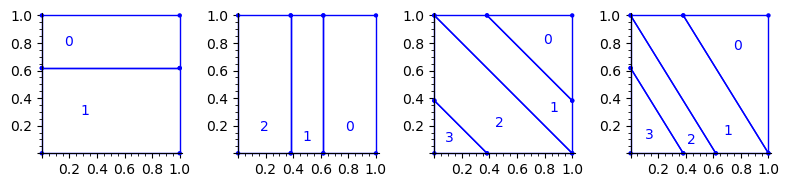

In [22]:
graphics_array([Pa.plot(), Pb.plot(), Pc.plot(), Pd.plot()]).show(figsize=8)

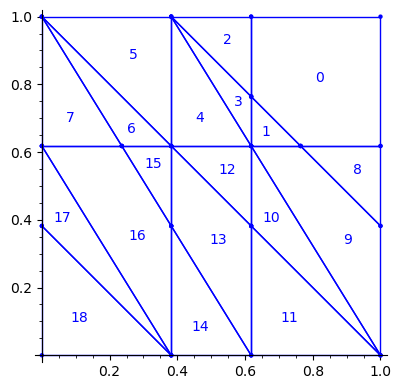

In [23]:
Pa.refinement(Pb).refinement(Pc).refinement(Pd).plot()

The partition $\Pcal_\Ucal$ using the labelling defined in [arXiv:1903.06137](https://arxiv.org/abs/1903.06137)

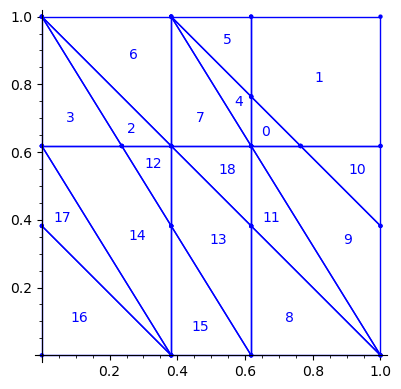

In [24]:
from slabbe.arXiv_1903_06137 import self_similar_19_atoms_partition
P0 = PU = self_similar_19_atoms_partition()
P0.plot()

## 4 - Inducing the partition $\Pcal_\Ucal$ with respect to a toral $\Z^2$-rotation

A continuous $\Z^2$-action $R_0$ on $\T^2$:
$\begin{array}{lcll}
    R_0:&\Z^2\times\T^2&\to&\T^2\\
    & (\bn,\bx)&\mapsto&\bx+\varphi^{-2}\bn \bmod\Z^2
\end{array}$


In [25]:
lattice_base = matrix.column([(1,0), (0,1)])
R0e1 = PET.toral_translation(lattice_base, vector((phi^-2,0)))
R0e2 = PET.toral_translation(lattice_base, vector((0,phi^-2)))

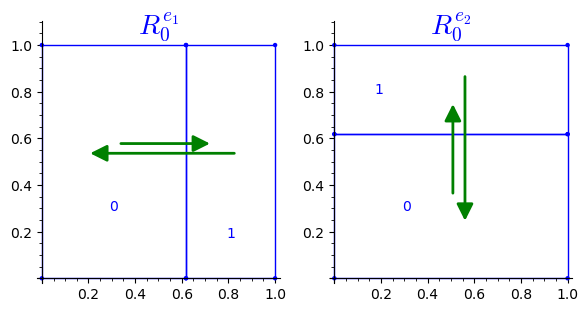

In [26]:
t1 = title(r"$R_0^{e_1}$", fontsize=20)
t2 = title(r"$R_0^{e_2}$", fontsize=20)
graphics_array([R0e1.plot()+t1, R0e2.plot()+t2])

#### Helper function ``please_draw_Rauzy_induction_for_Z2_action``

This is some code to draw induced transformation on the next slide (you may safely ignore what is below).

In [27]:
def please_draw_Rauzy_induction_for_Z2_action(T1, T2, P, inducedT1, inducedT2, inducedP, beta, 
                                                         subscripts=['',''],figsize=9, fontsize=15):
    input_subscript, output_subscript= subscripts
    t1 = title(r'$R^{e_1}%s$'%input_subscript, fontsize=fontsize)
    t2 = title(r'$R^{e_2}%s$'%input_subscript, fontsize=fontsize)
    t3 = title(r'$\mathcal{P}%s$'%input_subscript, fontsize=fontsize)
    t4 = title(r'$R^{e_1}%s:=\widehat{R^{e_1}%s}|_W$'%(output_subscript, input_subscript), fontsize=fontsize)
    t5 = title(r'$R^{e_1}%s:=\widehat{R^{e_2}%s}|_W$'%(output_subscript, input_subscript), fontsize=fontsize)
    t6 = title(r'$\mathcal{P}%s:=\widehat{\mathcal{P}%s}|_W$'%(output_subscript, input_subscript), fontsize=fontsize)
    graphics_array([T1.plot()+bb+t1, T2.plot()+bb+t2, P.plot()+bb+t3,
                    inducedT1.plot()+bb+t4, 
                    inducedT2.plot()+bb+t5, 
                    inducedP.plot()+bb+t6], ncols=3).show(figsize=figsize)
    show(LatexExpr(r"\text{The substitution is }"+
                   r"\beta{}:{}".format(input_subscript, latex(beta))))

### Vertical Rauzy induction $\Xcal_{\Pcal_{0},R_{0}}=\overline{\beta_0\left(\Xcal_{\Pcal_{1},R_{1}}\right)}^\sigma$

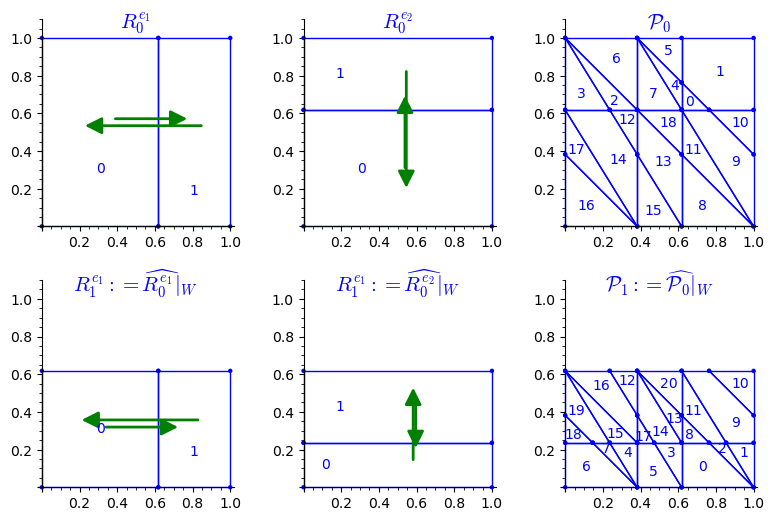

\text{The substitution is }\beta_0:\begin{array}{llllllll}
0\mapsto \left(8\right)
,&
1\mapsto \left(9\right)
,&
2\mapsto \left(11\right)
,&
3\mapsto \left(13\right)
,&
4\mapsto \left(14\right)
,&
5\mapsto \left(15\right)
,&
6\mapsto \left(16\right)
,&
7\mapsto \left(17\right)
,\\
8\mapsto \left(\begin{array}{r}
0 \\
8
\end{array}\right)
,&
9\mapsto \left(\begin{array}{r}
1 \\
9
\end{array}\right)
,&
10\mapsto \left(\begin{array}{r}
1 \\
10
\end{array}\right)
,&
11\mapsto \left(\begin{array}{r}
1 \\
11
\end{array}\right)
,&
12\mapsto \left(\begin{array}{r}
6 \\
12
\end{array}\right)
,&
13\mapsto \left(\begin{array}{r}
4 \\
13
\end{array}\right)
,&
14\mapsto \left(\begin{array}{r}
7 \\
13
\end{array}\right)
,&
15\mapsto \left(\begin{array}{r}
2 \\
14
\end{array}\right)
,\\
16\mapsto \left(\begin{array}{r}
6 \\
14
\end{array}\right)
,&
17\mapsto \left(\begin{array}{r}
7 \\
15
\end{array}\right)
,&
18\mapsto \left(\begin{array}{r}
3 \\
16
\end{array}\right)
,&
19\mapsto \left(\begin{array}{r}
3 \\
17
\end{array}\right)
,&
20\mapsto \left(\begin{array}{r}
5 \\
18
\end{array}\right)
.
\end{array}

In [28]:
y_ineq = [phi^-1, 0, -1] ###   <= phi^-1 (see Polyhedron? for syntax)
R1e1,_ = R0e1.induced_transformation(y_ineq)
R1e2,_ = R0e2.induced_transformation(y_ineq)
P1,beta0 = R0e2.induced_partition(y_ineq, P0, substitution_type='column')
please_draw_Rauzy_induction_for_Z2_action(R0e1, R0e2, PU, R1e1, R1e2, P1, beta0, subscripts=[r'_0','_1'], figsize=8)  

### Horizontal Rauzy induction $\Xcal_{\Pcal_{1},R_{1}}=\overline{\beta_1\left(\Xcal_{\Pcal_{2},R_{2}}\right)}^\sigma$

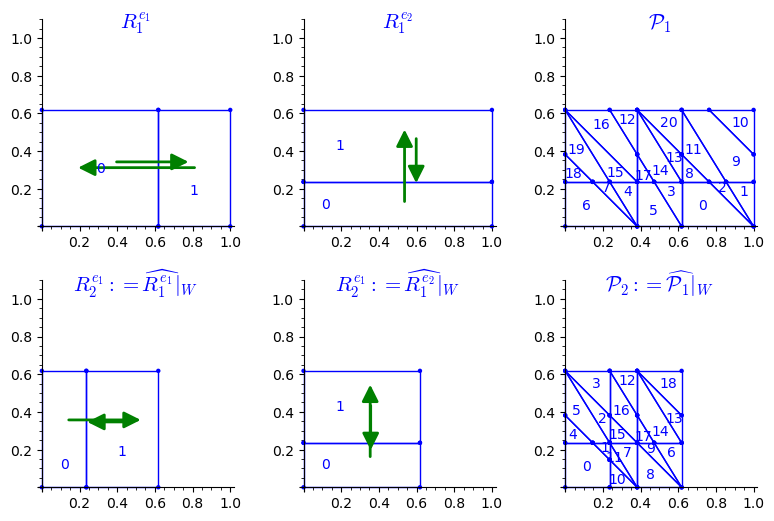

\text{The substitution is }\beta_1:\begin{array}{llllllll}
0\mapsto \left(6\right)
,&
1\mapsto \left(7\right)
,&
2\mapsto \left(15\right)
,&
3\mapsto \left(16\right)
,&
4\mapsto \left(18\right)
,&
5\mapsto \left(19\right)
,&
6\mapsto \left(3,\,1\right)
,&
7\mapsto \left(4,\,0\right)
,\\
8\mapsto \left(5,\,0\right)
,&
9\mapsto \left(5,\,2\right)
,&
10\mapsto \left(6,\,0\right)
,&
11\mapsto \left(7,\,0\right)
,&
12\mapsto \left(12,\,9\right)
,&
13\mapsto \left(13,\,9\right)
,&
14\mapsto \left(14,\,9\right)
,&
15\mapsto \left(15,\,8\right)
,\\
16\mapsto \left(16,\,11\right)
,&
17\mapsto \left(17,\,11\right)
,&
18\mapsto \left(20,\,10\right)
.
\end{array}

In [29]:
x_ineq = [phi^-1, -1, 0] ### x <= phi^-1 (see Polyhedron? for syntax)
R2e1,_ = R1e1.induced_transformation(x_ineq)
R2e2,_ = R1e2.induced_transformation(x_ineq)
P2,beta1 = R1e1.induced_partition(x_ineq, P1, substitution_type='row')
please_draw_Rauzy_induction_for_Z2_action(R1e1, R1e2, P1, R2e1, R2e2, P2, beta1, subscripts=[r'_1','_2'], figsize=8)

### Renormalization $\Xcal_{\Pcal_{2},R_{2}}=\Xcal_{\Pcal_{2'},R_{2'}}$

In [30]:
R2e1_scaled = (-phi*R2e1).translate_domain((1,1))
R2e2_scaled = (-phi*R2e2).translate_domain((1,1))
P2_scaled = (-phi*P2).translate((1,1))

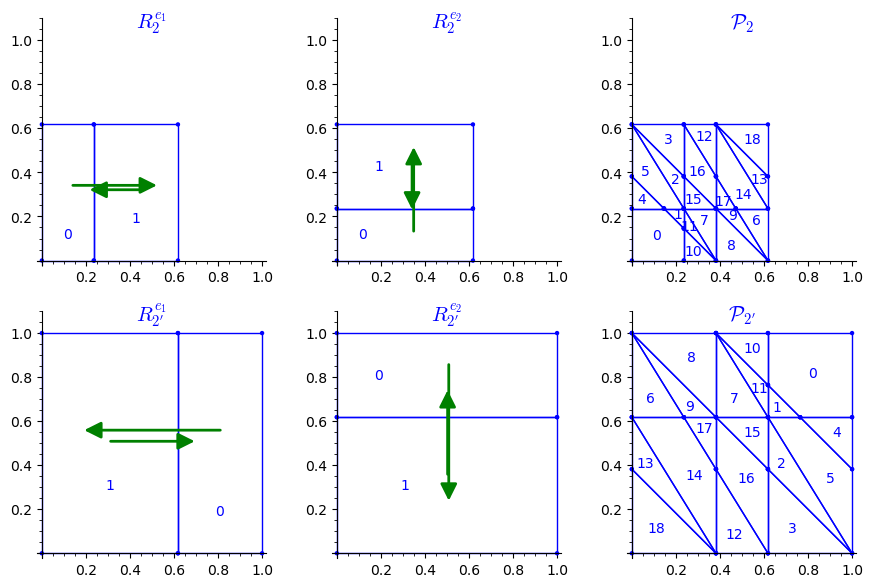

In [31]:
t1 = title(r"$R^{e_1}_{2}$", fontsize=15);t2 = title(r"$R^{e_2}_{2}$", fontsize=15);t3 = title(r"$\mathcal{P}_{2}$", fontsize=15)
t4 = title(r"$R^{e_1}_{2'}$", fontsize=15);t5 = title(r"$R^{e_2}_{2'}$", fontsize=15);t6 = title(r"$\mathcal{P}_{2'}$", fontsize=15)
graphics_array([R2e1.plot()+bb+t1, R2e2.plot()+bb+t2, P2.plot()+bb+t3,
                R2e1_scaled.plot()+t4, R2e2_scaled.plot()+t5, P2_scaled.plot()+t6], ncols=3).show(figsize=9)

### Back to the starting partition $\Pcal_0$

We observe that the scaled partition $\Pcal_{2'}$ is the same as
$\Pcal_0$ up to a permutation $\beta_2$ of the indices of the atoms
in such a way that 
    $\Xcal_{\Pcal_{2'},R_{2'}}=\beta_2\left(\Xcal_{\Pcal_0,R_0}\right)$

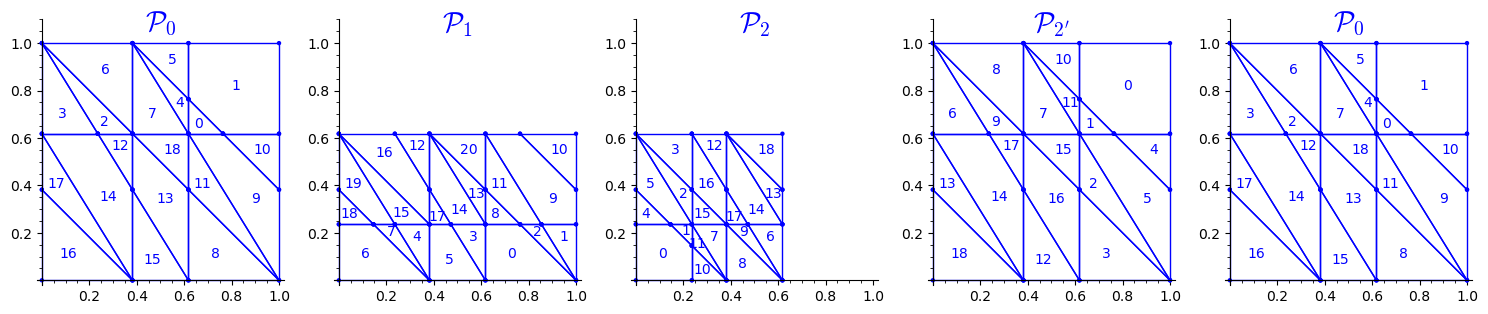

In [32]:
t1 = title(r'$\mathcal{P}_0$', fontsize=20);t2 = title(r'$\mathcal{P}_1$', fontsize=20)
t3 = title(r'$\mathcal{P}_2$', fontsize=20);t4 = title(r"$\mathcal{P}_{2'}$", fontsize=20)
L = [PU.plot()+t1, P1.plot()+bb+t2, P2.plot()+bb+t3, P2_scaled.plot()+t4, PU.plot()+t1]
graphics_array(L).show(figsize=15)

In [33]:
assert P2_scaled.is_equal_up_to_relabeling(PU)
from slabbe import Substitution2d
beta2 = Substitution2d.from_permutation(PU.keys_permutation(P2_scaled))
show(beta2)

Substitution 2d: {0: [[1]], 1: [[0]], 2: [[9]], 3: [[6]], 4: [[11]], 5: [[10]], 6: [[8]], 7: [[7]], 8: [[3]], 9: [[5]], 10: [[4]], 11: [[2]], 12: [[17]], 13: [[16]], 14: [[14]], 15: [[12]], 16: [[18]], 17: [[13]], 18: [[15]]}

### The self-similarity

In summary, we have

$$\begin{align*}
    \Xcal_{\Pcal_0,R_0}
    &= \overline{\beta_0(\Xcal_{\Pcal_1,R_1})}^\sigma
    = \overline{\beta_0\beta_1(\Xcal_{\Pcal_2,R_2})}^\sigma
    = \overline{\beta_0\beta_1(\Xcal_{\Pcal_{2'},R_{2'}})}^\sigma
    = \overline{\beta_0\beta_1\beta_2\left(\Xcal_{\Pcal_0,R_0}\right)}^\sigma
\end{align*}$$
with self-similarity $\phi=\beta_0\beta_1\beta_2$:

In [34]:
phi_ = beta0 * beta1 * beta2
show(phi_)

Substitution 2d: {0: [[17]], 1: [[16]], 2: [[15], [11]], 3: [[13], [9]], 4: [[17], [8]], 5: [[16], [8]], 6: [[15], [8]], 7: [[14], [8]], 8: [[14, 6]], 9: [[17, 3]], 10: [[16, 3]], 11: [[14, 2]], 12: [[15, 7], [11, 1]], 13: [[14, 6], [11, 1]], 14: [[13, 7], [9, 1]], 15: [[12, 6], [9, 1]], 16: [[18, 5], [10, 1]], 17: [[13, 4], [9, 1]], 18: [[14, 2], [8, 0]]}

 
Moreover, one can prove (from the study of $2\times 2$ factors) that there is a unique subshift $X$ such that $X=\overline{\phi(X)}^\sigma$. Thus
 $$\Xcal_{\Pcal_0,R_0}=\Xcal_\phi.$$
Also $\phi$ is onto up to a shift and recognizable. Thus $\Xcal_\phi$ is aperiodic.

## 5 - Results

Another characterization of $\Xcal_{\Pcal_0,R_0}$ is the Wang shift $\Omega_\Ucal\subseteq[0,18]^{\mathbb{Z}^2}$ 
defined by a set $\Ucal$ of 19 Wang tiles.

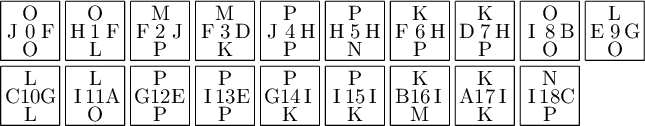

In [35]:
from slabbe import WangTileSet
tiles = ["FOJO", "FOHL", "JMFP", "DMFK", "HPJP", "HPHN", "HKFP", "HKDP", 
         "BOIO", "GLEO", "GLCL", "ALIO", "EPGP", "EPIP", "IPGK", "IPIK",
         "IKBM", "IKAK", "CNIP"]
U = WangTileSet([tuple(tile) for tile in tiles])
U.tikz()

which satisfies:
$$\Omega_\Ucal
    =\overline{\alpha_0(\Omega_\Vcal)}^\sigma
    =\overline{\alpha_0\alpha_1(\Omega_\Wcal)}^\sigma
    =\overline{\alpha_0\alpha_1\alpha_2(\Omega_\Ucal)}^\sigma
    =\overline{\phi(\Omega_\Ucal)}^\sigma$$
and
$$\beta_0=\alpha_0,\quad\beta_1=\alpha_1,\quad\quad\beta_2=\alpha_2.$$

The computation of $\alpha_0$, $\alpha_1$ and $\alpha_2$ is done using subset of marker tiles, see [this other 30 minutes talk](http://www.slabbe.org/Communications/2020-12-sda2.slides.html) (online SDA2 meeting, Caen, December 2020) or this chapter [arXiv:2012.03892](https://arxiv.org/abs/2012.03892)

### $\Pcal_\Ucal$ is a Markov partition for $\Z^2$-action  $R_\Ucal$ on $\T^2$

**Theorem**
 - (i) $\Xcal_{\Pcal_\Ucal,R_\Ucal}$ is minimal and aperiodic, and $\Xcal_{\Pcal_\Ucal,R_\Ucal}=\Xcal_\phi= \Omega_\Ucal$,
 - (ii) $\Pcal_\Ucal$ is a Markov partition for the dynamical system $(\T^2,\Z^2,R_\Ucal)$,
 - (iii) $(\T^2,\Z^2,R_\Ucal)$ is the maximal equicontinuous
factor of $(\Omega_\Ucal,\Z^2,\sigma)$,
 - (iv) the set of fiber cardinalities of the factor map
$\Omega_\Ucal\to\T^2$ is $\{1,2,8\}$,
 - (v) the dynamical system $(\Omega_\Ucal,\Z^2,\sigma)$ is strictly
    ergodic and the measure-preserving dynamical system $(\Omega_\Ucal,\Z^2,\sigma,\nu)$
    is isomorphic 
    to $(\T^2,\Z^2,R_\Ucal,\lambda)$ 
    where $\nu$ is the unique shift-invariant probability measure on
$\Omega_\Ucal$ and $\lambda$ is the Haar measure on $\T^2$.

**Theorem**
    There exists a 4-to-2 cut and project scheme such that
    for every configuration $w\in\Omega_\Ucal$,
    the set $Q\subseteq\Z^2$ of occurrences of a pattern in $w$
    is a regular model set.
    If $w$ is a generic (resp. singular) configuration,
    then $Q$ is a generic (resp. singular) model set.




#### Both $\Xcal_{\Pcal_\Ucal, R_\Ucal}$ and $\Omega_\Ucal$ come from the description of the Jeandel-Rao Wang shift

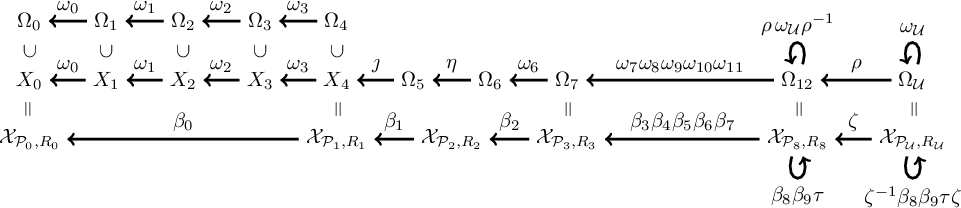

In [36]:
from slabbe import TikzPicture
with open('figure4.tex','r') as f: 
    s = f.read()
TikzPicture(s)

- A self-similar aperiodic set of 19 Wang tiles, *Geometriae Dedicata* 201 (2019) 81-109, [doi](https://doi.org/10.1007/s10711-018-0384-8), [arXiv:1802.03265](http://arxiv.org/abs/1802.03265)
- Substitutive structure of Jeandel-Rao aperiodic tilings. *Discrete Comput. Geom.*, 2019, [doi](https://doi.org/10.1007/s00454-019-00153-3), [arXiv:1808.07768](http://arxiv.org/abs/1808.07768)
- Markov partitions for toral $\mathbb{Z}^2$-rotations featuring Jeandel-Rao Wang shift and model sets. April 2020. to appear in *Annales Henri Lebesgue*. [arXiv:1903.06137v3](http://arxiv.org/abs/1903.06137v3)
- Rauzy induction of polygon partitions and toral $\mathbb{Z}^2$-rotations, last update January 2021, [arXiv:1906.01104v3](https://arxiv.org/abs/1906.01104v3)
- Chapter: Three characterizations of a self-similar aperiodic 2-dimensional subshift, Dec 2020, [arXiv:2012.03892](https://arxiv.org/abs/2012.03892)

## Code

- PyPI: https://pypi.org/project/slabbe/ (version 0.6.2, Dec 2020, running with SageMath 9.2)
- documentation: http://www.slabbe.org/docs/
- gitlab: http://gitlab.com/seblabbe/slabbe

**Installation**:

    sage -pip install slabbe
    
In case of trouble: email me.